In [15]:
K_MAX = 128
R_MAX = 1200
Z_MAX = 1200
import itertools as it

%run GenerateParameters.ipynb

Generating cache table of size 1200x1200x128 (~27.5 bits)...


  0%|          | 0/1199 [00:00<?, ?it/s]

Done. Table generation took 6.5 seconds


In [18]:
%run LowerBoundBAAOptimizer.ipynb

In [19]:
t0 = time.time()
l = 0.15
L_val = 7.72 / l
beta = 0.438 * l * L_val
dist = generate_optimized_distribution(l=l, L_target=L_val, beta=beta, step_limit=10000, delta=0.0001, verbose=True)
d2 = np.concatenate(([0], dist[:-1]), axis=0)
rd = RunDistribution(d2, l)
print(l, L_val * l, beta / (l * L_val), rd.compute_lower_bound() / l, time.time() - t0)

Computing BAA transition probs 511x512 (~2 ** 18.0)
That took 0.0 seconds


  0%|          | 0/10000 [00:00<?, ?it/s]

/tmp/ipykernel_2898/3725662477.py:20: RuntimeWarning: divide by zero encountered in log
  return np.sum(P_ji * np.log(Q * P_ji / denominator), axis=0) - beta * D_i
/tmp/ipykernel_2898/1051017242.py:4: RuntimeWarning: divide by zero encountered in log
  log_alphas = np.log(alphas) + power
/tmp/ipykernel_2898/1775114465.py:29: RuntimeWarning: divide by zero encountered in true_divide
  d = np.max(np.log(Q / next_Q))
/tmp/ipykernel_2898/1775114465.py:29: RuntimeWarning: invalid value encountered in true_divide
  d = np.max(np.log(Q / next_Q))


The expected score of this distribution is [0.01341731], and it is at most nan from optimal.
0.15 7.72 0.438 0.12193593022376742 44.27583575248718


In [21]:
rd.D

0.04281331966938755

In [6]:
t0 = time.time()
l = 0.2
L_val = 7.72 / l
beta = 0.438 * l * L_val
dist = generate_optimized_distribution(l=l, L_target=L_val, beta=beta, step_limit=1000, verbose=False)
d2 = np.concatenate(([0], dist[:-1]), axis=0)
rd = RunDistribution(d2, l)
print(l, L_val * l, beta / (l * L_val), rd.compute_lower_bound() / l, time.time() - t0)

0.2 7.719999999999999 0.43800000000000006 0.12208584946182857 5.993968725204468


In [6]:
t0 = time.time()
# l = 0.25
ls = [0.2]
# ls = np.linspace(0.15, 0.25, 11)
# L_vals = np.linspace(7.7, 7.8, 11) / l
# L_val = 7.75 / l
# beta_vals = L_val * l * np.linspace(0.434, 0.444, 11)
# for beta in beta_vals:
# for L_val in L_vals:
for l in ls:
    L_val = 7.72 / l
    beta = 0.438 * l * L_val
    dist = generate_optimized_distribution(l=l, L_target=L_val, beta=beta, step_limit=1000, verbose=False)
    d2 = np.concatenate(([0], dist[:-1]), axis=0)
    rd = RunDistribution(d2, l)
    print(l, L_val * l, beta / (l * L_val), rd.compute_lower_bound() / l, time.time() - t0)

0.2 7.719999999999999 0.43800000000000006 0.12208584946182857 5.993968725204468


In [10]:
1 / 0.122085

8.191014457140517

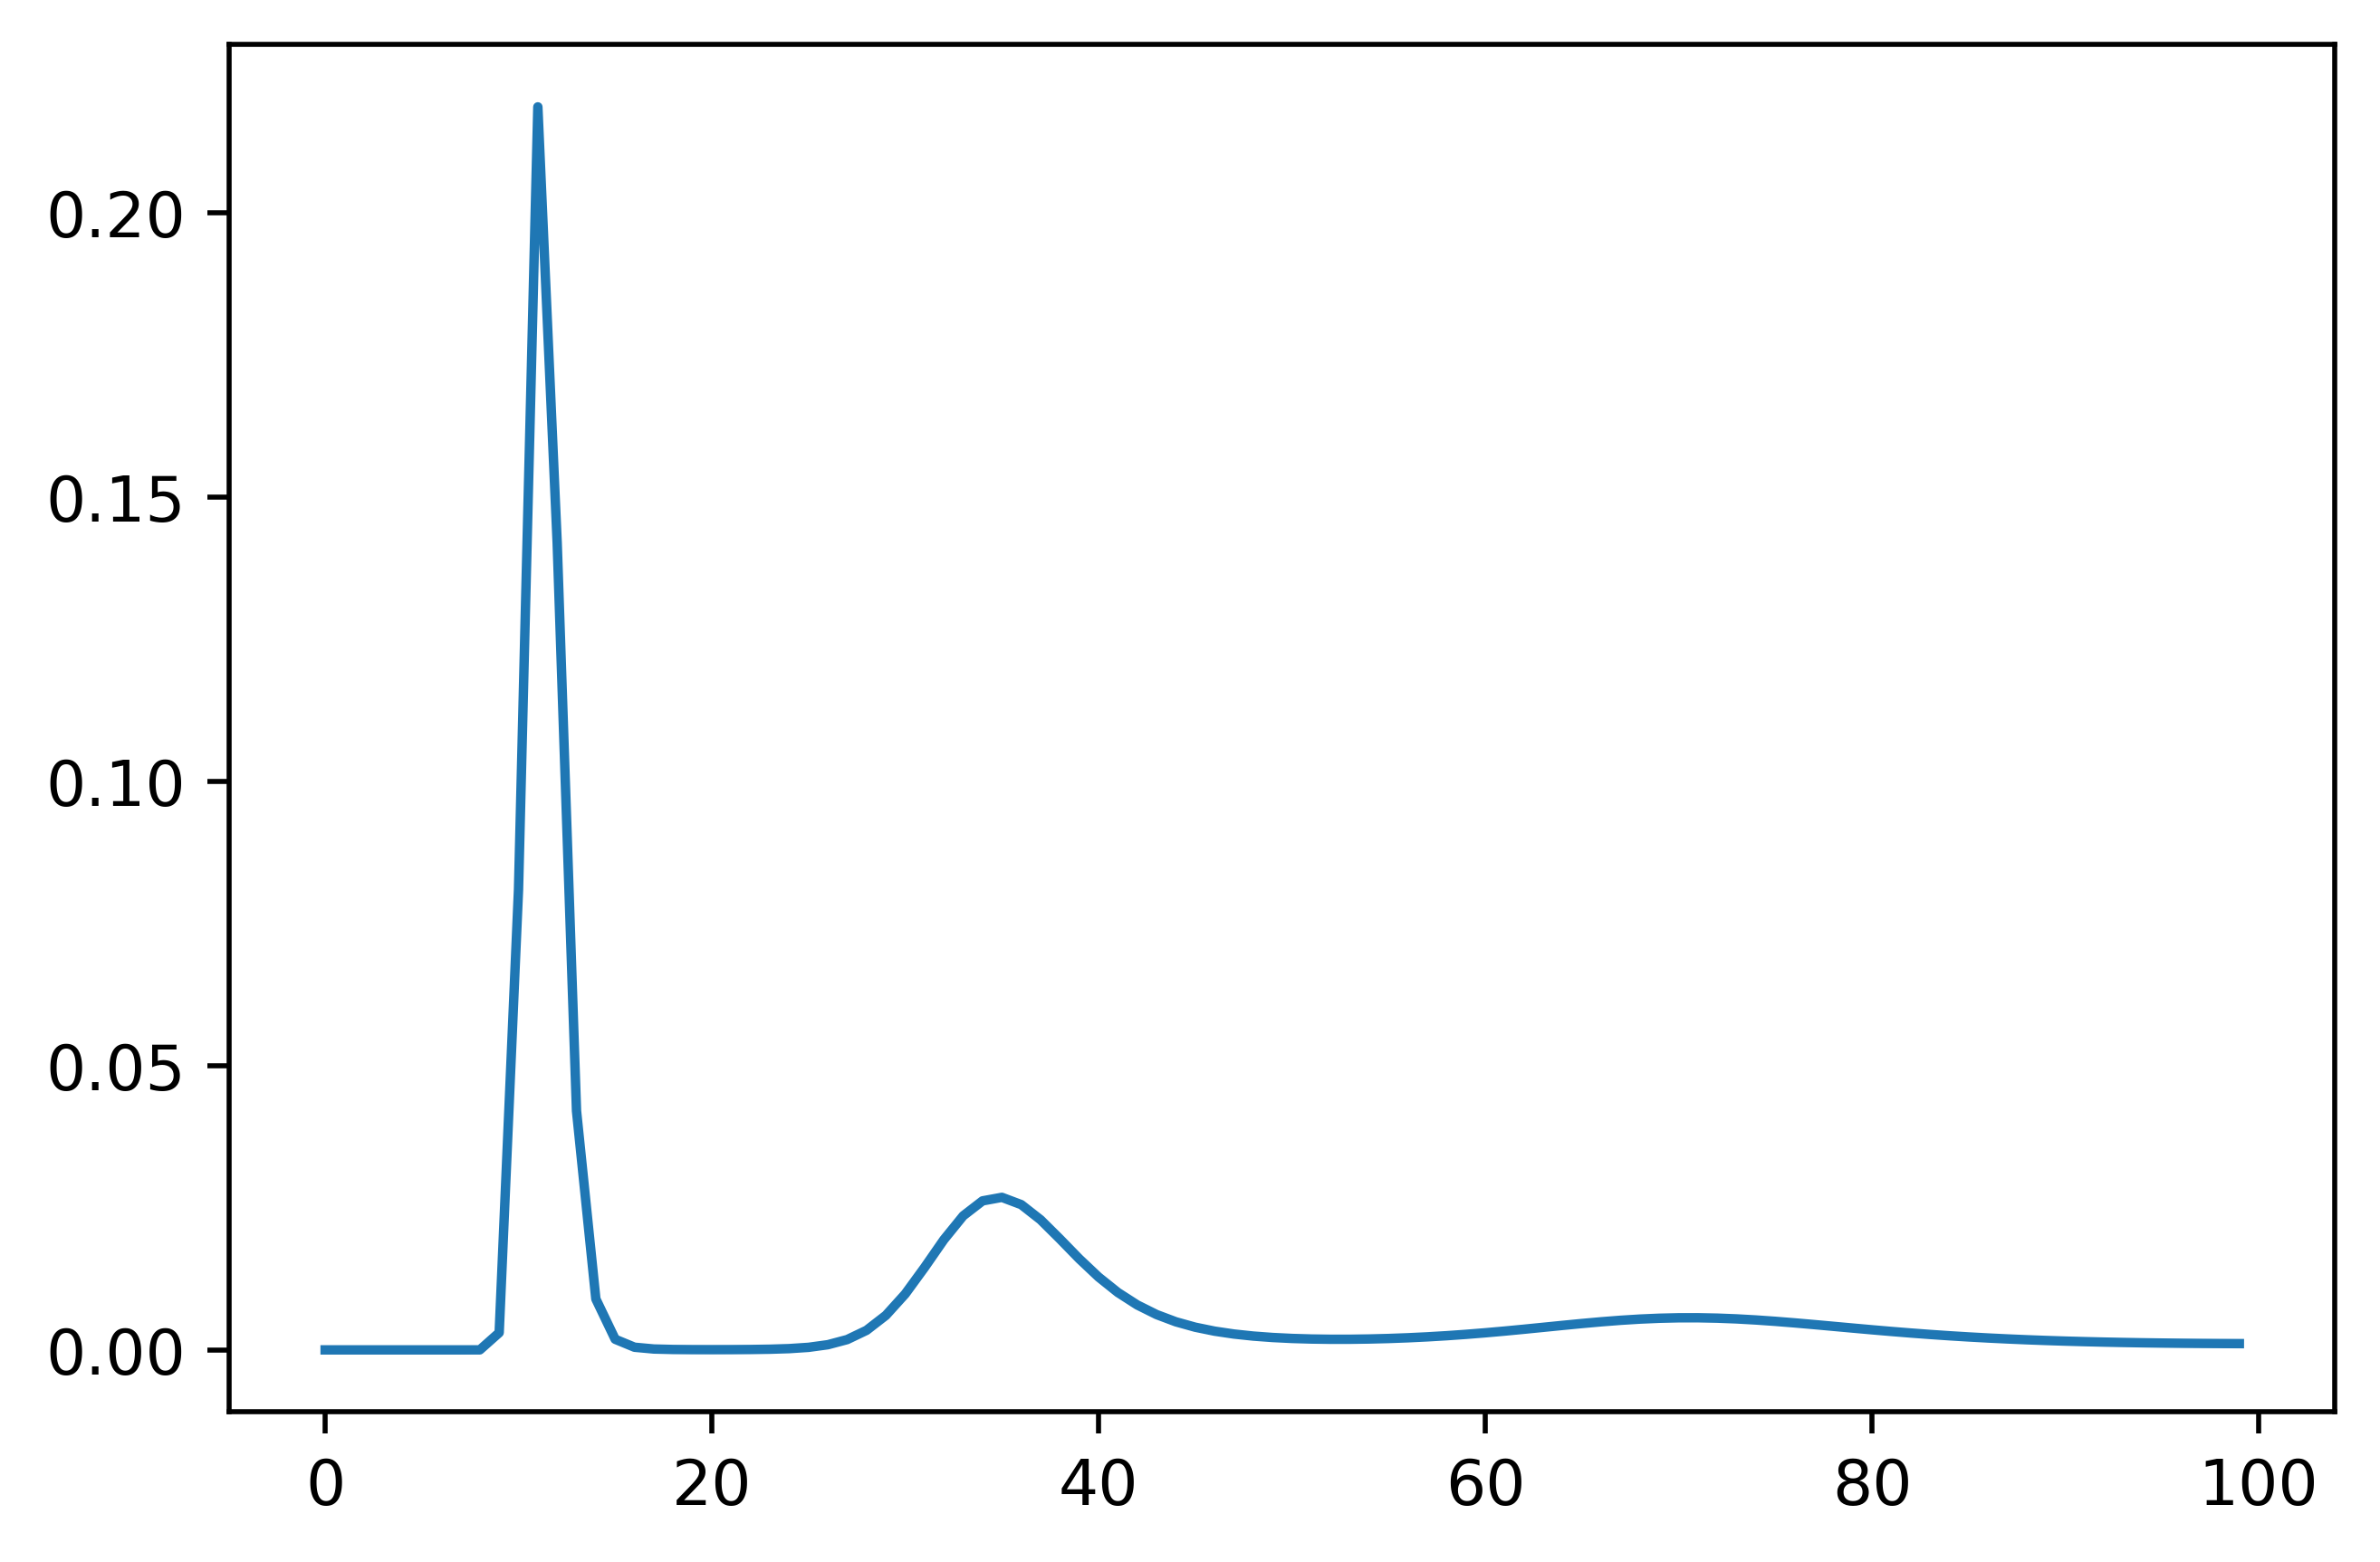

In [9]:
f = plt.figure(dpi = 500)
plt.plot(dist[:100])